In [1]:
%run "../Functions/functions_v1.ipynb"

# Ingest and clean data

In [3]:
#ingest raw data
years = [x for x in range(2016, 2024)]

new_table = True
df_joined_fin = None
df_clean_fin = None
for year in years:
    print(year)

    #Get data from year
    df_raw = pd.read_csv(f"../Data/{year}_matches.csv")

    #print(df_raw.columns)
    #clean scraped data
    df_clean = clean_raw_scraped_df(df_raw)


    #transform data into each team having a single row
    df_merged = create_one_col_df(df_clean)
    df_joined = get_opp_stats(df_merged)

    #Save down df_joined_fin which will be used from training
    #Save down the clean, pre-transformed data for inference 
    if new_table:
        df_joined_fin = df_joined
        df_clean_fin = df_clean
        new_table = False
    else:
        df_joined_fin = pd.concat([df_joined_fin, df_joined])
        df_clean_fin = pd.concat([df_clean_fin, df_clean])

#df_clean

2016
2017
2018
2019
2020
2021
2022
2023


In [4]:
df_clean_fin

,date,team_1,team_2,score_1,score_2,location,elo_change_1,elo_change_2,new_elo_1,new_elo_2,...,new_rank_2,old_elo_1,old_elo_2,old_rank_1,old_rank_2,elo_diff_1,elo_diff_2,result,result_class,game_id
0,2016-01-03,India,Afghanistan,2,1,South Asian Championship in India,+19,−19,1082,1124,...,174,1063,1143,181,174,-80,80,"[1, 0, 0]",T1,2016-01-03IndiaAfghanistan
1,2016-01-06,Estonia,Sweden,1,1,Friendly in the United Arab Emirates,+7,−7,1501,1760,...,29,1494,1767,87,31,-273,273,"[0, 1, 0]",D,2016-01-06EstoniaSweden
2,2016-01-08,Bangladesh,Sri Lanka,4,2,Bangabandhu Gold Cup in Bangladesh,+10,−10,900,765,...,211,890,775,202,211,115,-115,"[1, 0, 0]",T1,2016-01-08BangladeshSri Lanka
3,2016-01-08,Haiti,Trinidad and Tobago,1,0,Copa América qualifier in Panama,+28,−28,1504,1587,...,61,1476,1615,82,67,-139,139,"[1, 0, 0]",T1,2016-01-08HaitiTrinidad and Tobago
4,2016-01-08,Panama,Cuba,4,0,Copa América qualifier in Panama,+5,−5,1688,1335,...,125,1683,1340,42,128,343,-343,"[1, 0, 0]",T1,2016-01-08PanamaCuba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1055,2023-12-27,Zanzibar,Tanzania,0,0,Friendly in Zanzibar,−2,+2,1326,1351,...,118,1328,1349,131,116,-21,21,"[0, 1, 0]",D,2023-12-27ZanzibarTanzania
1056,2023-12-28,Lebanon,Jordan,2,1,Friendly in Lebanon,+13,−13,1312,1503,...,76,1299,1516,130,76,-217,217,"[1, 0, 0]",T1,2023-12-28LebanonJordan
1057,2023-12-29,Oman,China,2,0,Friendly in the United Arab Emirates,+12,−12,1554,1449,...,93,1542,1461,65,95,81,-81,"[1, 0, 0]",T1,2023-12-29OmanChina
1058,2023-12-30,United Arab Emirates,Kyrgyzstan,1,0,Friendly in the United Arab Emirates,+2,−2,1529,1249,...,155,1527,1251,72,156,276,-276,"[1, 0, 0]",T1,2023-12-30United Arab EmiratesKyrgyzstan


In [5]:
df_joined_fin

,game_id,date,location,team,opp,score,opp_score,old_elo,opp_elo,elo_diff,result_class
0,2016-01-03IndiaAfghanistan,2016-01-03,South Asian Championship in India,India,Afghanistan,2,1,1063,1143,-80,T1
1,2016-01-03IndiaAfghanistan,2016-01-03,South Asian Championship in India,Afghanistan,India,1,2,1143,1063,80,T2
2,2016-01-06EstoniaSweden,2016-01-06,Friendly in the United Arab Emirates,Estonia,Sweden,1,1,1494,1767,-273,D
3,2016-01-06EstoniaSweden,2016-01-06,Friendly in the United Arab Emirates,Sweden,Estonia,1,1,1767,1494,273,D
4,2016-01-08BangladeshSri Lanka,2016-01-08,Bangabandhu Gold Cup in Bangladesh,Bangladesh,Sri Lanka,4,2,890,775,115,T1
...,...,...,...,...,...,...,...,...,...,...,...
2115,2023-12-29OmanChina,2023-12-29,Friendly in the United Arab Emirates,Oman,China,2,0,1542,1461,81,T1
2116,2023-12-30United Arab EmiratesKyrgyzstan,2023-12-30,Friendly in the United Arab Emirates,Kyrgyzstan,United Arab Emirates,0,1,1251,1527,-276,T2
2117,2023-12-30United Arab EmiratesKyrgyzstan,2023-12-30,Friendly in the United Arab Emirates,United Arab Emirates,Kyrgyzstan,1,0,1527,1251,276,T1
2118,2023-12-31QatarCambodia,2023-12-31,Friendly in Qatar,Qatar,Cambodia,3,0,1535,847,688,T1


# Create ELO Model

In [7]:
elo = []
result = []
for x in range(-1200, 1250, 50):
    for y in ["T1", "D", "T2"]:
        elo.append(x)
        result.append(y)

df_base = pd.DataFrame()
df_base["rounded_elo"] = elo
df_base["result_class"] = result
df_base

,rounded_elo,result_class
0,-1200,T1
1,-1200,D
2,-1200,T2
3,-1150,T1
4,-1150,D
...,...,...
142,1150,D
143,1150,T2
144,1200,T1
145,1200,D


In [8]:
df_joined_fin["rounded_elo"] = df_joined_fin["elo_diff"].apply(apply_elo_50_rounding)
df_joined_fin["count"] = 1

counts_by_elo = df_joined_fin.groupby(by = ["rounded_elo"])["count"].sum().reset_index()
counts_by_elo.columns = ["rounded_elo", "total_c"]
results_elo = df_joined_fin.groupby(by = ["rounded_elo", "result_class"])["count"].sum().reset_index()

joined = df_base.merge(results_elo, on = ["rounded_elo", "result_class"], how = "left").merge(counts_by_elo, on = ["rounded_elo"], how = "left").fillna(0)
joined["pct"] = joined["count"] / joined["total_c"]
joined["result_class"] = pd.Categorical(joined["result_class"], categories = ["T1", "D", "T2"], ordered = True)


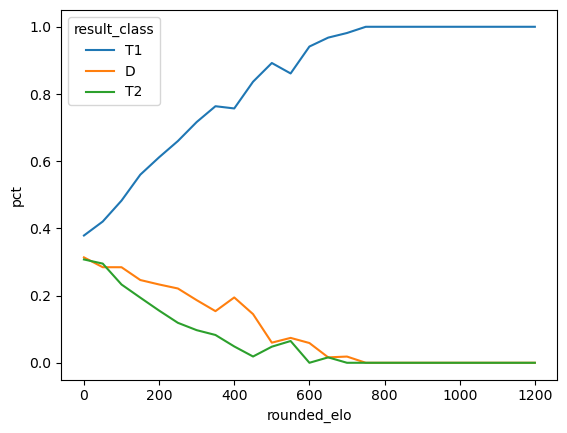

In [19]:
sns.lineplot(data = joined[joined["rounded_elo"] >= 0]
             , x = "rounded_elo", y = "pct", hue = "result_class")
#sns.lineplot(data = joined, x = "rounded_elo", y = "pct", hue = "result")
plt.show()

In [21]:
# Save the DataFrame to a CSV file
joined.to_csv(f'../Data/elo_win_rates.csv', index=False)